# Estimation of obesity levels based on eating habits and physical condition Data Set
[UCI Link](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)

Data Set Information:

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

In [140]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import cluster, metrics
from scipy import cluster as scpcluster
sns.set()
warnings.simplefilter("ignore")

## Load Data

In [146]:
def load_data():
    url = "ObesityDataSet_raw_and_data_sinthetic.csv"
    data = pd.read_csv(url, skiprows=0, header=0)
    return data

In [147]:
data = load_data()

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [151]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [164]:
class_map = dict(enumerate(data['NObeyesdad'].astype('category').cat.categories))

Text(0.5, 1.0, 'Scatter Plot')

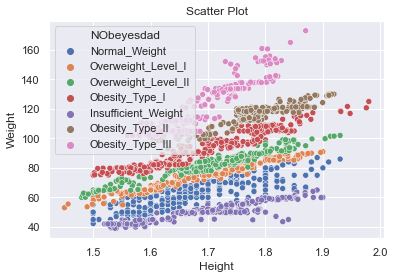

In [152]:
sns.scatterplot(data=data, x="Height", y="Weight", hue='NObeyesdad')
plt.title('Scatter Plot')

## K-Means Clustering

In [159]:
df = data[["Height", "Weight"]]
X = data[["Height", "Weight"]]
kmeans = cluster.KMeans(n_clusters=4, random_state=0).fit(X)

In [160]:
kmeans.labels_

array([2, 2, 0, ..., 1, 1, 1])

In [161]:
kmeans.cluster_centers_

array([[  1.6945924 ,  79.87783658],
       [  1.78810092, 128.2785035 ],
       [  1.65093431,  54.64272102],
       [  1.71486865, 105.94268446]])

In [162]:
df['y'] = pd.Series(kmeans.labels_)

Text(0.5, 1.0, 'K-means Cluster Plot with Centroids')

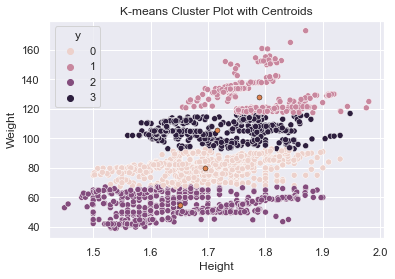

In [163]:
ax = sns.scatterplot(data=df, x="Height", y="Weight", hue='y')
ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=25, ec='black', legend=False, ax=ax)
plt.title('K-means Cluster Plot with Centroids')

In [126]:
print("Prediction for person with height {} and weight {} is {}".format(1.7, 40, class_map[kmeans.predict([[70, 1.7]])[0]]))

Prediction for person with height 1.7 and weight 40 is Obesity_Type_I


In [145]:
print("Silhouette score for K-Means Clustering is {}".format(metrics.silhouette_score(X, labels=df['y'])))

Silhouette score for K-Means Clustering is 0.5879618315663809


## Agglomerative Clustering

In [134]:
aggclst = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(X)

In [135]:
aggclst.labels_

array([0, 0, 2, ..., 3, 3, 3], dtype=int64)

In [136]:
df['y2'] = pd.Series(aggclst.labels_)

<Figure size 720x504 with 0 Axes>

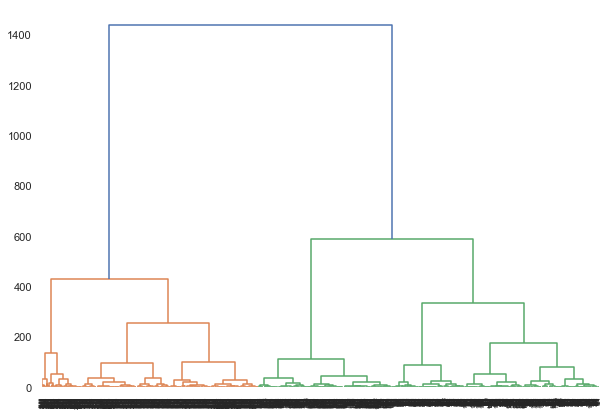

In [139]:
plt.figure(figsize=(10, 7))

linked = scpcluster.hierarchy.linkage(X, 'ward')

plt.figure(figsize=(10, 7))
scpcluster.hierarchy.dendrogram(linked)

plt.show()

Text(0.5, 1.0, 'Agglomerative Clustering Cluster Plot')

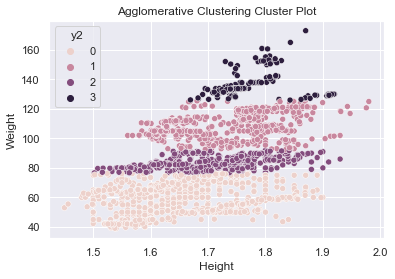

In [138]:
ax = sns.scatterplot(data=df, x="Height", y="Weight", hue='y2')
plt.title('Agglomerative Clustering Cluster Plot')

In [143]:
print("Silhouette score for Agglomerative Clustering is {}".format(metrics.silhouette_score(X, labels=df['y2'])))

Silhouette score for Agglomerative Clustering is 0.5279243103133363


## Elbow Curve

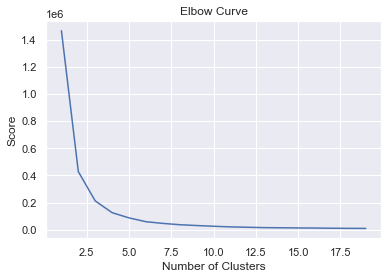

In [110]:
Nc = range(1, 20)
kmeans = [cluster.KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()